**7.4 Lagrange Polynomial Interpolation**

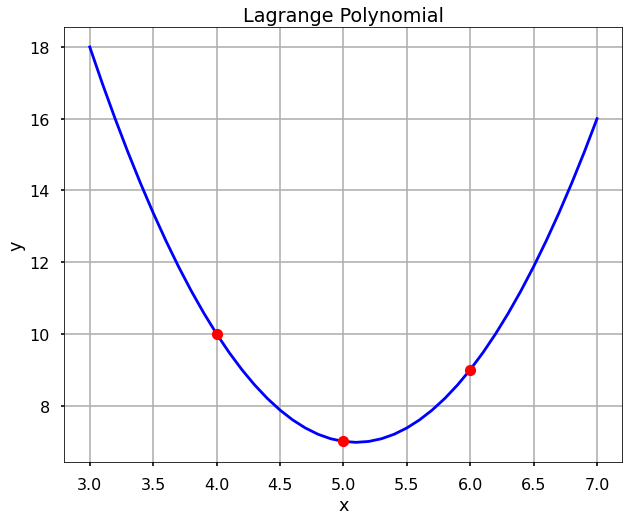

In [37]:
#For this example I used the given code for the lagrange function, but altered the data points to see how it would react. In this case the graph seemingly
#reflected according to it's given data points

#Imported packages
import numpy as np
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange

#Data points that will be graphed
x = [4, 5, 6]
y = [10, 7, 9]

#Sets the range for the x values on the graph based on the data points
x_new = np.arange(3, 7.1, 0.1)

#Uses the given lagrance function
f = lagrange(x, y)

#Plots the data and graph
fig = plt.figure(figsize = (10,8))
plt.plot(x_new, f(x_new), 'b', x, y, 'ro')
plt.title('Lagrange Polynomial')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()


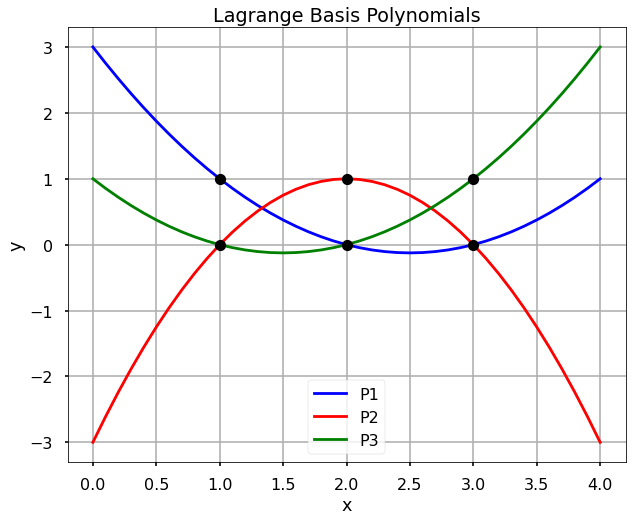

In [36]:
#For this example, I altered the data points and completed the math required in order to obtain the coefficents, based on the formulas provided.

#Imported Packages
import numpy as np
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')


#Data Points
x = [1, 2, 3]
y = [4, 7, 2]

#Coefficents gathered from solving the equations for each x value.
P1_coeff = [3,-5/2,1/2] #(x-2)(x-3)/(1-2)(1-3)
P2_coeff = [-3,4,-1] #(x-1)(x-3)/(2-1)(2-3)
P3_coeff = [1,-3/2,1/2] #(x-1)(x-2)/(3-1)(3-2)

#This assigns each polynomial coefficent and obtains the function
P1 = poly.Polynomial(P1_coeff)
P2 = poly.Polynomial(P2_coeff)
P3 = poly.Polynomial(P3_coeff)

#Sets the range of the x values for the graph
x_new = np.arange(0, 4.1, 0.1)

#Plots the lines using each polynomial aquired.
fig = plt.figure(figsize = (10,8))
plt.plot(x_new, P1(x_new), 'b', label = 'P1')
plt.plot(x_new, P2(x_new), 'r', label = 'P2')
plt.plot(x_new, P3(x_new), 'g', label = 'P3')

#Plots the data points
plt.plot(x, np.ones(len(x)), 'ko', x, np.zeros(len(x)), 'ko')
plt.title('Lagrange Basis Polynomials')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()
plt.show()


**7.5 Newton's Polynomial Interpolation**

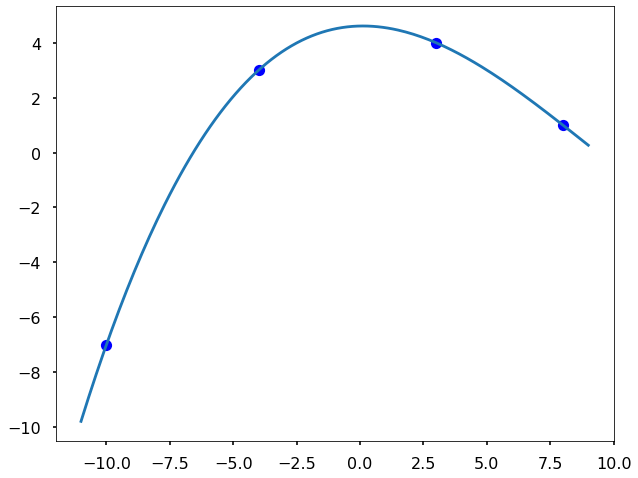

In [35]:
#Code below is also provided in the textbook which demonstrates how to apply Newton's Polynomial Interpolation. I graphed the divided difference for
# x= [-10, -4, 3, 8] and y = [-7, 3, 4, 1]


#Defines the division function
def divided_diff(x, y):
    n = len(y)
    #Represents the coefficients alongside their columns
    coef = np.zeros([n, n])
    coef[:,0] = y
    #For loop to iterate through 
    for j in range(1,n):
        for i in range(n-j):
            coef[i][j] = \
           (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j]-x[i])
    return coef

#Defines the newton polynomial function
def newton_poly(coef, x_data, x):
  #Calculates the length minus 1
    n = len(x_data) - 1 
    p = coef[n]
    #For loop to iterate through the data
    for k in range(1,n+1):
        p = coef[n-k] + (x -x_data[n-k])*p
    return p

#Given arrays for this example
x = np.array([-10, -4, 3, 8])
y = np.array([-7, 3, 4, 1])

#Obtains the coefficient fr the divided difference
a_s = divided_diff(x, y)[0, :]

# Sets the range for the x values and the newton polynomial
x_new = np.arange(-11, 9.1, .1)
y_new = newton_poly(a_s, x, x_new)

#Creates the plot
plt.figure(figsize = (10, 8))
plt.plot(x, y, 'bo')
plt.plot(x_new, y_new)